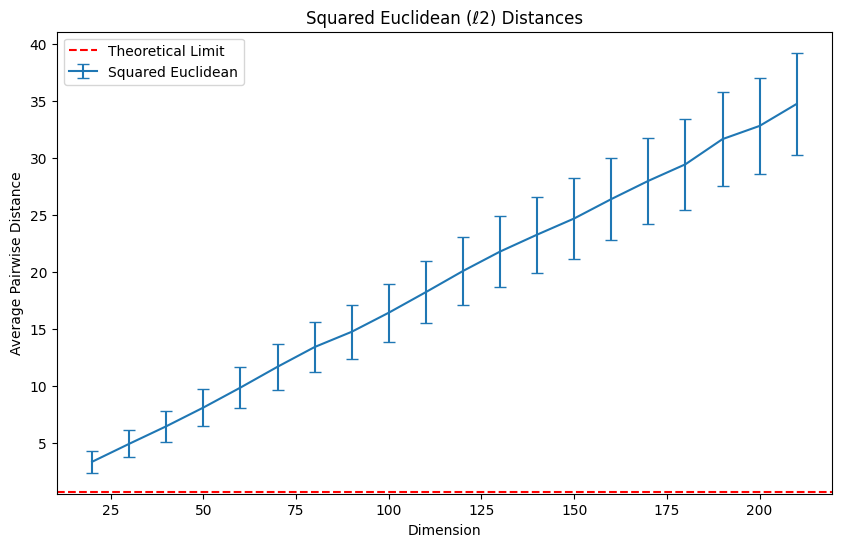

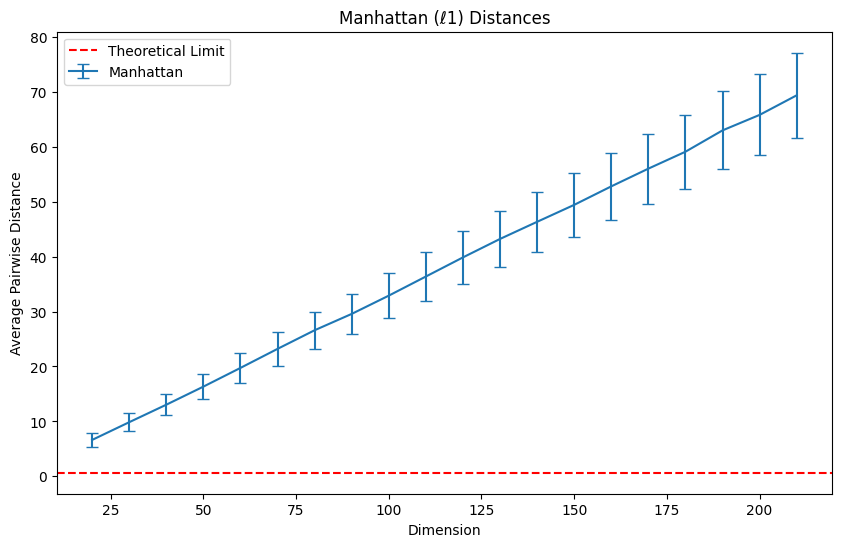

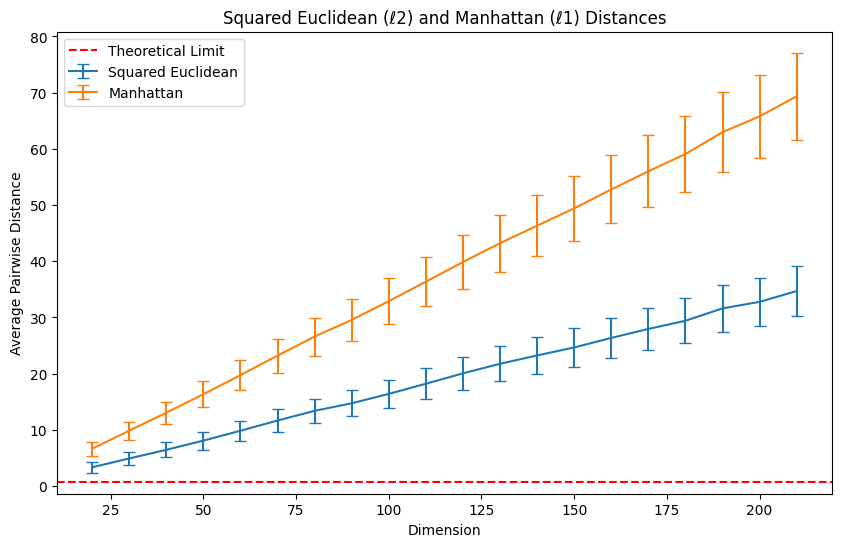

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def compute_avg_distances(d, num_points=100):
    # Generate random points in the unit hypercube
    points = np.random.rand(num_points, d)

    # Compute pairwise squared Euclidean distances
    sq_euclid_dists = squareform(pdist(points, 'euclidean')**2)

    # Compute pairwise Manhattan distances
    manhattan_dists = squareform(pdist(points, 'cityblock'))

    # Compute average and standard deviation
    avg_sq_euclid = np.mean(sq_euclid_dists)
    std_sq_euclid = np.std(sq_euclid_dists)

    avg_manhattan = np.mean(manhattan_dists)
    std_manhattan = np.std(manhattan_dists)

    return avg_sq_euclid, std_sq_euclid, avg_manhattan, std_manhattan

# Dimensions to test
dimensions = range(20, 211, 10)

# Lists to store results
sq_euclid_avgs = []
sq_euclid_stds = []
manhattan_avgs = []
manhattan_stds = []

for d in dimensions:
    avg_sq_euclid, std_sq_euclid, avg_manhattan, std_manhattan = compute_avg_distances(d)
    sq_euclid_avgs.append(avg_sq_euclid)
    sq_euclid_stds.append(std_sq_euclid)
    manhattan_avgs.append(avg_manhattan)
    manhattan_stds.append(std_manhattan)

# Plot squared Euclidean distances
plt.figure(figsize=(10, 6))
plt.errorbar(dimensions, sq_euclid_avgs, yerr=sq_euclid_stds, capsize=4, label='Squared Euclidean')
plt.axhline(y=2/3, color='r', linestyle='--', label='Theoretical Limit')
plt.xlabel('Dimension')
plt.ylabel('Average Pairwise Distance')
plt.title('Squared Euclidean (ℓ2) Distances')
plt.legend()
plt.show()

# Plot Manhattan distances
plt.figure(figsize=(10, 6))
plt.errorbar(dimensions, manhattan_avgs, yerr=manhattan_stds, capsize=4, label='Manhattan')
plt.axhline(y=2/3, color='r', linestyle='--', label='Theoretical Limit')
plt.xlabel('Dimension')
plt.ylabel('Average Pairwise Distance')
plt.title('Manhattan (ℓ1) Distances')
plt.legend()
plt.show()

# Plot squared Euclidean and Manhattan distances together
plt.figure(figsize=(10, 6))
plt.errorbar(dimensions, sq_euclid_avgs, yerr=sq_euclid_stds, capsize=4, label='Squared Euclidean')
plt.errorbar(dimensions, manhattan_avgs, yerr=manhattan_stds, capsize=4, label='Manhattan')
plt.axhline(y=2/3, color='r', linestyle='--', label='Theoretical Limit')
plt.xlabel('Dimension')
plt.ylabel('Average Pairwise Distance')
plt.title('Squared Euclidean (ℓ2) and Manhattan (ℓ1) Distances')
plt.legend()
plt.show()